In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind
from scipy.stats import fisher_exact
from scipy.stats.contingency import odds_ratio
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
bmi_df = pd.read_csv(
    "/data6/deepro/ukb_bmi/0_data_preparation_and_download/phenotype/data/bmi_processed/filtered_bmi_info.csv.gz",
    usecols=["bmi", "sample_names", "sex"])

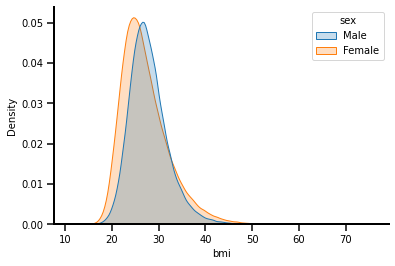

In [3]:
sns.kdeplot(data=bmi_df, x='bmi', hue='sex', fill=True)
sns.despine()

In [4]:
def create_case_col(df, filter_column, filter_val, thresh=None):
    filt_df = df.loc[df[filter_column]==filter_val]
    if not thresh:
        thresh = filt_df.bmi.mean() + 2*filt_df.bmi.std()
    filt_df["cases"] = filt_df.bmi>thresh
    return filt_df

In [5]:
male_bmi = create_case_col(bmi_df, "sex", "Male")
female_bmi = create_case_col(bmi_df, "sex", "Female")

/tmp/ipykernel_100393/2710216536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df["cases"] = filt_df.bmi>thresh
/tmp/ipykernel_100393/2710216536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df["cases"] = filt_df.bmi>thresh


In [6]:
male_bmi.bmi.mean(), female_bmi.bmi.mean()

(27.83363489204046, 27.098472270644628)

In [7]:
table = [[len(male_bmi.loc[male_bmi.cases==True]), len(female_bmi.loc[female_bmi.cases==True])], [len(male_bmi.loc[male_bmi.cases==False]), len(female_bmi.loc[female_bmi.cases==False])]]
df = pd.DataFrame(table, columns=["Male", "Female"], index=["Obese", "Non-obese"])

In [8]:
df

,Male,Female
Obese,8802,12059
Non-obese,218598,259739


In [9]:
fisher_exact(df)

SignificanceResult(statistic=0.8672834300969938, pvalue=1.9917242743680112e-23)

In [10]:
res = odds_ratio(df)

In [11]:
res.statistic, res.confidence_interval(confidence_level=0.95)

(0.8672836757260365,
 ConfidenceInterval(low=0.8431878289978293, high=0.8920429078211379))